In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
#Remove unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# check for null values
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<Axes: xlabel='Transported'>

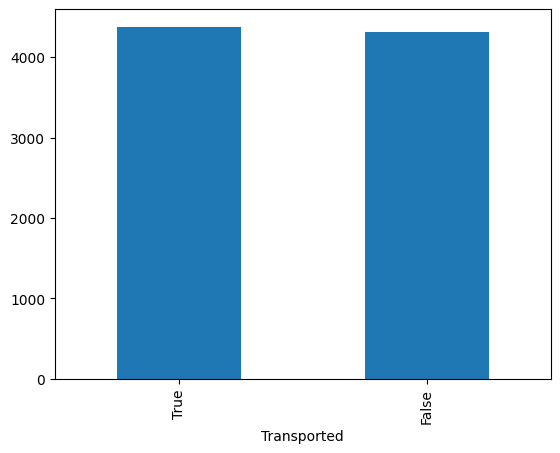

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_df = train_data.Transported.value_counts()
plot_df.plot(kind="bar")

In [9]:
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [10]:
#Handle missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

train_data[numeric_features] = SimpleImputer(strategy='median').fit_transform(train_data[numeric_features])
train_data[categorical_features] = SimpleImputer(strategy='most_frequent').fit_transform(train_data[categorical_features])

train_data[categorical_features] = OrdinalEncoder().fit_transform(train_data[categorical_features])

In [11]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
train_data['Transported'] = train_data['Transported'].astype(int)

In [13]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,149.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,2184.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,0.0,0.0,2186.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


In [14]:
test_copy = test_data.copy()

In [15]:
#Preprocess test data
test_copy = test_copy.drop(['PassengerId', 'Name'], axis=1)
test_copy[numeric_features] = SimpleImputer(strategy='median').fit_transform(test_copy[numeric_features])
test_copy[categorical_features] = SimpleImputer(strategy='most_frequent').fit_transform(test_copy[categorical_features])
test_copy[categorical_features] = OrdinalEncoder().fit_transform(test_copy[categorical_features])

In [16]:
X = train_data.drop(columns=['Transported'])
y = train_data['Transported']

In [17]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Define XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.02,
    random_state=42,
    verbosity=1  # Enables training output
)

# ✅ Train the model
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='logloss',
    early_stopping_rounds=20,
    verbose=True
)

# ✅ Make predictions
val_preds = model.predict(X_val)

[0]	validation_0-logloss:0.68500
[1]	validation_0-logloss:0.67719
[2]	validation_0-logloss:0.66974
[3]	validation_0-logloss:0.66245
[4]	validation_0-logloss:0.65548
[5]	validation_0-logloss:0.64884
[6]	validation_0-logloss:0.64232
[7]	validation_0-logloss:0.63603
[8]	validation_0-logloss:0.63001
[9]	validation_0-logloss:0.62420
[10]	validation_0-logloss:0.61851
[11]	validation_0-logloss:0.61309
[12]	validation_0-logloss:0.60784
[13]	validation_0-logloss:0.60281
[14]	validation_0-logloss:0.59788
[15]	validation_0-logloss:0.59311
[16]	validation_0-logloss:0.58843
[17]	validation_0-logloss:0.58401
[18]	validation_0-logloss:0.57965
[19]	validation_0-logloss:0.57539
[20]	validation_0-logloss:0.57124
[21]	validation_0-logloss:0.56733
[22]	validation_0-logloss:0.56351
[23]	validation_0-logloss:0.55978
[24]	validation_0-logloss:0.55611


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.55269
[26]	validation_0-logloss:0.54931
[27]	validation_0-logloss:0.54600
[28]	validation_0-logloss:0.54282
[29]	validation_0-logloss:0.53974
[30]	validation_0-logloss:0.53672
[31]	validation_0-logloss:0.53372
[32]	validation_0-logloss:0.53085
[33]	validation_0-logloss:0.52813
[34]	validation_0-logloss:0.52542
[35]	validation_0-logloss:0.52291
[36]	validation_0-logloss:0.52039
[37]	validation_0-logloss:0.51800
[38]	validation_0-logloss:0.51564
[39]	validation_0-logloss:0.51325
[40]	validation_0-logloss:0.51096
[41]	validation_0-logloss:0.50882
[42]	validation_0-logloss:0.50669
[43]	validation_0-logloss:0.50464
[44]	validation_0-logloss:0.50262
[45]	validation_0-logloss:0.50069
[46]	validation_0-logloss:0.49868
[47]	validation_0-logloss:0.49684
[48]	validation_0-logloss:0.49504
[49]	validation_0-logloss:0.49335
[50]	validation_0-logloss:0.49164
[51]	validation_0-logloss:0.49001
[52]	validation_0-logloss:0.48834
[53]	validation_0-logloss:0.48673
[54]	validatio

In [18]:
preds = model.predict(test_copy)
preds

array([1, 0, 1, ..., 1, 1, 1])

In [19]:

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': preds.astype(bool)
})
submission.to_csv('submission.csv', index=False)